In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

color_palette = sns.color_palette("colorblind")
sns.set_theme(palette=color_palette, font="Arial", font_scale=1.0, style="white")

In [2]:
#styles for error and markers in sns.lineplot

thin_custom_lw = 1.2
custom_lw = thin_custom_lw/0.65

filled_marker_style = dict(marker='o',  markersize=5,
                           color='k',
                           markerfacecolor='w',
                           markeredgecolor='k',
                          markeredgewidth=thin_custom_lw)

filled_marker_style_white = dict(marker='o',  markersize=5,
                           color='w',
                           markerfacecolor='w',
                           markeredgecolor='w',
                          markeredgewidth=custom_lw)
######################

error_style_white = {"capsize": 4.4, 
                "ecolor": "w",
               "barsabove":False, 
               "elinewidth":custom_lw, 
               "capthick":custom_lw,
                    "zorder": 8}

error_style = {"capsize": 4, 
                "ecolor": "k",
                "barsabove":False, 
                "elinewidth":thin_custom_lw, 
                "capthick":thin_custom_lw,
                "zorder": 9}

# number of iterations and seed for bootstrapping during calculation of confidence intervals
n_boot = 10000
seed = 10

<h1> ACTH ELISA Auswertung</h1>

In [3]:
# Load ELISA data for ACTH

elisa_data = pd.read_csv("20231220/ACTH ELISA abcam (ac2638800)_1382.csv", skiprows=15)
elisa_data = elisa_data.iloc[0:48, 0:4]
elisa_data.columns = ["Well", "OD450", "OD630", "Concentration"]
elisa_data = elisa_data.astype({"OD450": "float32",
                                "OD630": "float32",
                                "Concentration": "float32"})

animal_data = pd.read_csv("20231220/20231220_assignment.csv", sep=";")
animal_data = animal_data.astype({"Dilution": "float32"})

elisa_data["Experiment"] = elisa_data.apply(lambda row: animal_data[animal_data.Well == row.Well].Experiment.values[0], axis=1)
elisa_data["Genotype"] = elisa_data.apply(lambda row: animal_data[animal_data.Well == row.Well].Genotype.values[0], axis=1)
elisa_data["ID"] = elisa_data.apply(lambda row: animal_data[animal_data.Well == row.Well].ID.values[0], axis=1)
elisa_data["Concentration"] = elisa_data.apply(lambda row: row.Concentration * animal_data[animal_data.Well == row.Well].Dilution.values[0], axis=1)

elisa_data_mean = elisa_data.groupby("ID").mean(numeric_only=True).reset_index()
elisa_data_mean["Experiment"] = elisa_data_mean.apply(lambda row: animal_data[animal_data.ID == row.ID].Experiment.values[0], axis=1)
elisa_data_mean["Genotype"] = elisa_data_mean.apply(lambda row: animal_data[animal_data.ID == row.ID].Genotype.values[0], axis=1)
elisa_data_mean = elisa_data_mean[elisa_data_mean.Experiment=="Cacna1hKO"] # Only look at Cacna1h WT or KO


In [4]:
elisa_data_mean

,ID,OD450,OD630,Concentration,Experiment,Genotype
11,6147,0.0895,0.0350,53.213728,Cacna1hKO,KO
12,6148,0.4690,0.0380,769.871918,Cacna1hKO,KO
13,6221,0.7400,0.0435,1214.385925,Cacna1hKO,WT
15,6668,0.8880,0.0425,1447.195984,Cacna1hKO,WT
19,7025,0.6615,0.0400,1086.184326,Cacna1hKO,KO
20,7127,0.0925,0.0355,58.984113,Cacna1hKO,KO
21,7128,0.1085,0.0380,97.656052,Cacna1hKO,KO
22,7129,0.6410,0.0395,1053.509338,Cacna1hKO,WT
23,7132,0.4025,0.0370,652.208557,Cacna1hKO,WT
24,7134,0.4730,0.0400,771.759949,Cacna1hKO,WT


Text(33.0, 0.5, 'Concentration (pg/ml)')

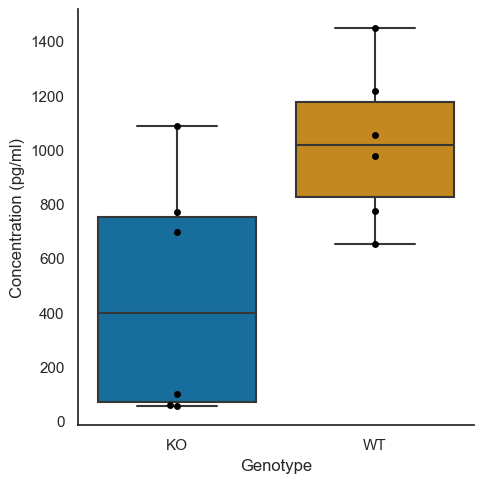

In [5]:
subset_elisa_data = elisa_data_mean
sns.catplot(data=subset_elisa_data, x="Genotype", y="Concentration", kind="box", legend=False)
sns.swarmplot(data=subset_elisa_data, x="Genotype", y="Concentration", color="black")

plt.ylabel("Concentration (pg/ml)")
#plt.savefig("ACTH_Boxplot.png")

C:\Users\dinhha\AppData\Local\Temp\ipykernel_19496\2197324654.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.swarmplot(data=subset_elisa_data, x="Genotype", y="Concentration",


Text(-27.75, 0.5, 'Concentration (pg/ml)')

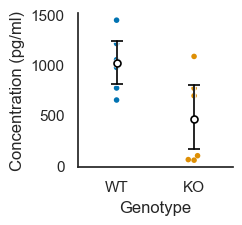

In [6]:
subset_elisa_data = elisa_data_mean
fig, g = plt.subplots(figsize=(2, 2))

g = sns.swarmplot(data=subset_elisa_data, x="Genotype", y="Concentration",
                order= ["WT", "KO"],
                 palette=[color_palette[0], color_palette[1]],
                 s=4, zorder=2, legend=False)

g = sns.lineplot(data=subset_elisa_data, x="Genotype", y="Concentration",lw=0,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
             zorder=3,  
             err_style="bars", 
             err_kws=error_style_white, 
             fillstyle="full", 
             **filled_marker_style_white)
             
    
g = sns.lineplot(data=subset_elisa_data, x="Genotype", y="Concentration",lw=0,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
             zorder=10,  
             err_style="bars",
             err_kws=error_style,
             fillstyle="full", 
             **filled_marker_style)

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.xlim([-0.5, 1.5])

plt.ylabel("Concentration (pg/ml)")

In [7]:
wt_data = subset_elisa_data[subset_elisa_data.Genotype=="WT"].Concentration.values
ko_data = subset_elisa_data[subset_elisa_data.Genotype=="KO"].Concentration.values

stat, p = shapiro(subset_elisa_data.Concentration.values)
if p > 0.05:
    print(mannwhitneyu(wt_data, ko_data))
else:
    print(ttest_ind(wt_data, ko_data))

MannwhitneyuResult(statistic=30.0, pvalue=0.06493506493506493)


In [8]:
subset_elisa_data

,ID,OD450,OD630,Concentration,Experiment,Genotype
11,6147,0.0895,0.0350,53.213728,Cacna1hKO,KO
12,6148,0.4690,0.0380,769.871918,Cacna1hKO,KO
13,6221,0.7400,0.0435,1214.385925,Cacna1hKO,WT
15,6668,0.8880,0.0425,1447.195984,Cacna1hKO,WT
19,7025,0.6615,0.0400,1086.184326,Cacna1hKO,KO
20,7127,0.0925,0.0355,58.984113,Cacna1hKO,KO
21,7128,0.1085,0.0380,97.656052,Cacna1hKO,KO
22,7129,0.6410,0.0395,1053.509338,Cacna1hKO,WT
23,7132,0.4025,0.0370,652.208557,Cacna1hKO,WT
24,7134,0.4730,0.0400,771.759949,Cacna1hKO,WT


<h1> Corticosterone ELISA Auswertung

In [9]:
# Load ELISA data for corticosterone

cort_data = pd.read_csv("20231220/Corticosterone ELISA DRG EIA-4164_1384.csv", skiprows=15, na_values=["-inf", "NaN"])

cort_data = cort_data.iloc[0:40, 0:4]
cort_data.columns =  ["Well", "OD450", "OD630", "Concentration"]
cort_data = cort_data.astype({"OD450": "float32",
                                "OD630": "float32",
                                "Concentration": "float32"})

cort_data["Experiment"] = cort_data.apply(lambda row: animal_data[animal_data.Well == row.Well].Experiment.values[0], axis=1)
cort_data["Genotype"] = cort_data.apply(lambda row: animal_data[animal_data.Well == row.Well].Genotype.values[0], axis=1)
cort_data["ID"] = cort_data.apply(lambda row: animal_data[animal_data.Well == row.Well].ID.values[0], axis=1)

cort_data = cort_data[cort_data.Concentration != float('-inf')] # Remove -inf values
# Multiply all values by 2 as they were 1:1 diluted!
cort_data["Concentration"] = cort_data.apply(lambda row: row.Concentration * 2, axis=1)

cort_data_mean = cort_data.groupby("ID").mean(numeric_only=True).reset_index()
cort_data_mean["Experiment"] = cort_data_mean.apply(lambda row: animal_data[animal_data.ID == row.ID].Experiment.values[0], axis=1)
cort_data_mean["Genotype"] = cort_data_mean.apply(lambda row: animal_data[animal_data.ID == row.ID].Genotype.values[0], axis=1)

cort_data_mean = cort_data_mean[cort_data_mean.Experiment=="Cacna1hKO"] # Only look at Cacna1h WT or KO



In [10]:
cort_data_mean

,ID,OD450,OD630,Concentration,Experiment,Genotype
7,6147,1.1410,0.0375,24.648885,Cacna1hKO,KO
8,6148,0.5680,0.0525,141.083145,Cacna1hKO,KO
9,6221,0.5230,0.0365,170.200066,Cacna1hKO,WT
11,6668,0.5725,0.0380,138.416527,Cacna1hKO,WT
15,7025,0.4590,0.0420,233.311134,Cacna1hKO,KO
16,7127,0.3790,0.0390,421.960693,Cacna1hKO,KO
17,7128,0.7680,0.0395,99.428921,Cacna1hKO,KO
18,7129,0.4765,0.0385,215.173805,Cacna1hKO,WT
19,7132,0.3570,0.0390,564.890320,Cacna1hKO,WT
20,7134,0.5055,0.0385,184.275368,Cacna1hKO,WT


C:\Users\dinhha\AppData\Local\Temp\ipykernel_19496\978400330.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.swarmplot(data=subset_cort_data, x="Genotype", y="Concentration",


Text(-19.25, 0.5, 'Concentration (nmol/l)')

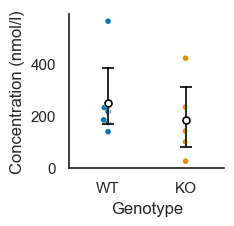

In [11]:
subset_cort_data = cort_data_mean
fig, g = plt.subplots(figsize=(2, 2))
g = sns.swarmplot(data=subset_cort_data, x="Genotype", y="Concentration",
                   order= ["WT", "KO"],
                 palette=[color_palette[0], color_palette[1]],
                 s=4, zorder=2, legend=False)

g = sns.lineplot(data=subset_cort_data, x="Genotype", y="Concentration",
                 lw=0,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
             zorder=3,  
             err_style="bars", 
             err_kws=error_style_white, 
             fillstyle="full", 
             **filled_marker_style_white)
             
    
g = sns.lineplot(data=subset_cort_data, x="Genotype", y="Concentration",
                 lw=0,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
             zorder=10,  
             err_style="bars",
             err_kws=error_style,
             fillstyle="full", 
             **filled_marker_style)

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.xlim([-0.5, 1.5])

plt.ylabel("Concentration (nmol/l)")

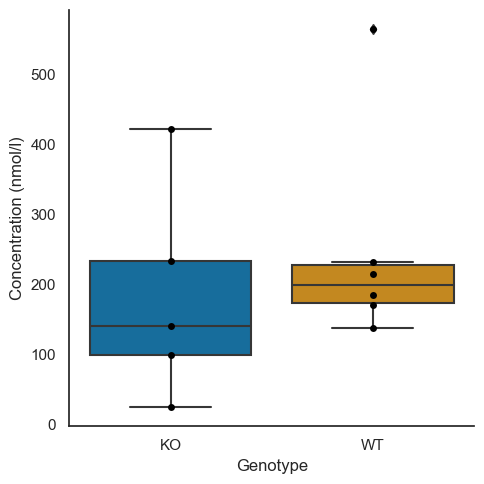

In [12]:
subset_cort_data = cort_data_mean
sns.catplot(data=subset_cort_data, x="Genotype", y="Concentration", kind="box", legend=False)
sns.swarmplot(data=subset_cort_data, x="Genotype", y="Concentration", color="black")
plt.ylabel("Concentration (nmol/l)")

In [13]:
wt_data = subset_cort_data[subset_cort_data.Genotype=="WT"].Concentration.values
ko_data = subset_cort_data[subset_cort_data.Genotype=="KO"].Concentration.values

stat, p = shapiro(subset_cort_data.Concentration.values)
if p > 0.05:
    print(mannwhitneyu(wt_data, ko_data))
else:
    print(ttest_ind(wt_data, ko_data))

MannwhitneyuResult(statistic=19.0, pvalue=0.5367965367965368)


<h1> Corticosterone/ACTH Ratio

In [14]:
subset_cort_acth_data = cort_data_mean
subset_cort_acth_data["ACTH_Concentration"] = subset_cort_acth_data.apply(lambda row: elisa_data_mean[elisa_data_mean.ID == row.ID].Concentration.values[0], axis=1)
subset_cort_acth_data["Corticosterone/ACTH"] = subset_cort_acth_data["Concentration"]/subset_cort_acth_data["ACTH_Concentration"]

Text(33.000000000000014, 0.5, 'Ratio Corticosterone/ACTH')

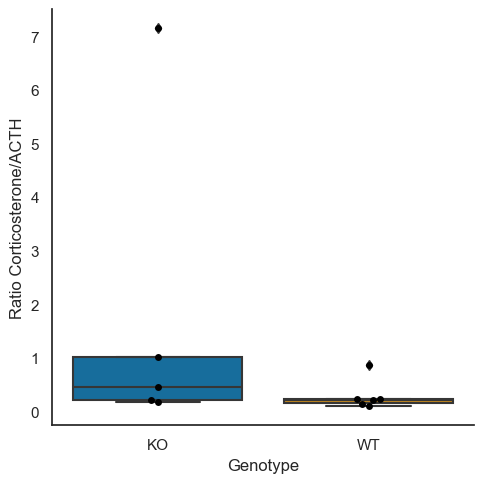

In [15]:
sns.catplot(data=subset_cort_acth_data, x="Genotype", y="Corticosterone/ACTH", kind="box", legend=False)
sns.swarmplot(data=subset_cort_acth_data, x="Genotype", y="Corticosterone/ACTH", color="black")
plt.ylabel("Ratio Corticosterone/ACTH")

C:\Users\dinhha\AppData\Local\Temp\ipykernel_19496\2723974097.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.swarmplot(data=subset_cort_acth_data, x="Genotype", y="Corticosterone/ACTH",


Text(-2.375, 0.5, 'Ratio Corticosterone/ACTH')

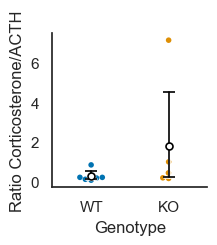

In [16]:
fig, g = plt.subplots(figsize=(2, 2))
g = sns.swarmplot(data=subset_cort_acth_data, x="Genotype", y="Corticosterone/ACTH",
                   order= ["WT", "KO"],
                 palette=[color_palette[0], color_palette[1]],
                 s=4, zorder=2, legend=False)

g = sns.lineplot(data=subset_cort_acth_data, x="Genotype", y="Corticosterone/ACTH",
                 lw=0,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
             zorder=3,  
             err_style="bars", 
             err_kws=error_style_white, 
             fillstyle="full", 
             **filled_marker_style_white)
             
    
g = sns.lineplot(data=subset_cort_acth_data, x="Genotype", y="Corticosterone/ACTH",
                 lw=0,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
             zorder=10,  
             err_style="bars",
             err_kws=error_style,
             fillstyle="full", 
             **filled_marker_style)

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
plt.xlim([-0.5, 1.5])

plt.ylabel("Ratio Corticosterone/ACTH")

In [45]:
subset_cort_acth_data

,ID,OD450,OD630,Concentration,Experiment,Genotype,ACTH_Concentration,Corticosterone/ACTH
7,6147,1.1410,0.0375,24.648885,Cacna1hKO,KO,53.213728,0.463205
8,6148,0.5680,0.0525,141.083145,Cacna1hKO,KO,769.871918,0.183255
9,6221,0.5230,0.0365,170.200066,Cacna1hKO,WT,1214.385925,0.140153
11,6668,0.5725,0.0380,138.416527,Cacna1hKO,WT,1447.195984,0.095645
15,7025,0.4590,0.0420,233.311134,Cacna1hKO,KO,1086.184326,0.214799
16,7127,0.3790,0.0390,421.960693,Cacna1hKO,KO,58.984113,7.153803
17,7128,0.7680,0.0395,99.428921,Cacna1hKO,KO,97.656052,1.018154
18,7129,0.4765,0.0385,215.173805,Cacna1hKO,WT,1053.509338,0.204245
19,7132,0.3570,0.0390,564.890320,Cacna1hKO,WT,652.208557,0.866119
20,7134,0.5055,0.0385,184.275368,Cacna1hKO,WT,771.759949,0.238773


In [17]:
wt_data = subset_cort_acth_data[subset_cort_acth_data.Genotype=="WT"]["Corticosterone/ACTH"].values
ko_data = subset_cort_acth_data[subset_cort_acth_data.Genotype=="KO"]["Corticosterone/ACTH"].values

stat, p = shapiro(subset_cort_acth_data["Corticosterone/ACTH"].values)
if p > 0.05:
    print(mannwhitneyu(wt_data, ko_data))
else:
    print(ttest_ind(wt_data, ko_data))

Ttest_indResult(statistic=-1.2364115393620814, pvalue=0.24759888175703523)
